In [92]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.sparse

# Part 1

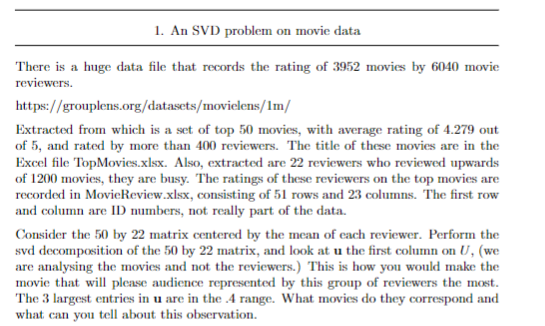

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
%cd /content/drive/MyDrive/Matrix
%ls *.xlsx

/content/drive/MyDrive/Matrix
Mag7Return-1.xlsx  MovieReview-1.xlsx  TopMovies-1.xlsx


In [95]:
# Reset all pandas display options to their default values
pd.reset_option("all")

<ipython-input-95-86be1f39415d>:2: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
<ipython-input-95-86be1f39415d>:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


In [96]:
dir_file = os.getcwd() # returns path to current directory
files_dir = os.listdir(dir_file)  # list of files in current directory

xlsx_files = [f for f in files_dir if f.endswith('xlsx')]
print(xlsx_files)

movie_file = xlsx_files[0]

movie_df = pd.read_excel(movie_file)
print(movie_df.columns)  # the columns
print(movie_df.shape)

['MovieReview-1.xlsx', 'TopMovies-1.xlsx', 'Mag7Return-1.xlsx']
Index(['Movie\Reviewer',              424,              889,             1015,
                   1150,             1181,             1449,             1680,
                   1941,             1980,             2063,             2909,
                   3391,             3618,             3841,             4169,
                   4227,             4277,             4344,             4510,
                   5795,             5831],
      dtype='object')
(50, 22)


In [97]:
# Assuming 'movie_df' is your DataFrame
# Exclude the first row and first column to get only the matrix of values
matrix_values = movie_df.iloc[0:, 1:]

#center the matrix
matrix_values = matrix_values - matrix_values.mean(axis=0)

# Print the resulting matrix
print(matrix_values.to_string(index=False, header=True))

  424   889  1015  1150  1181  1449  1680  1941  1980  2063  2909  3391  3618  3841  4169  4227  4277  4344  4510  5795  5831
 0.76 -3.34   0.1   0.6  0.16   1.5  1.98   1.7  1.22  3.56  1.24  1.86  2.16  0.64  0.58 -2.34  0.68  0.14 -0.58  1.18  0.98
 0.76  0.66   1.1   1.6  0.16  -0.5 -1.02   1.7  0.22  2.56  1.24  1.86  1.16  1.64  0.58  2.66  0.68  1.14  1.42  1.18 -0.02
-0.24  1.66   0.1  -1.4 -3.84   0.5 -3.02   0.7  1.22  2.56  0.24  1.86  1.16  0.64 -1.42 -2.34  0.68  1.14  0.42  1.18  0.98
-0.24 -0.34   0.1  -1.4 -0.84   0.5  0.98   0.7  1.22  2.56  1.24  1.86  1.16 -0.36  0.58 -2.34  0.68  1.14  1.42  1.18  0.98
 0.76  1.66   1.1  -0.4 -0.84   1.5  1.98   1.7  1.22  3.56  1.24  1.86  2.16  1.64  0.58  2.66  0.68 -1.86  1.42  1.18 -0.02
-4.24 -3.34  -3.9   0.6  0.16  -3.5  0.98  -3.3 -3.78 -1.44 -0.76 -3.14 -2.84 -3.36 -4.42 -2.34  0.68 -3.86 -3.58 -3.82 -0.02
-4.24 -3.34  -3.9   1.6 -0.84  -3.5  0.98  -3.3 -3.78 -1.44 -0.76 -3.14 -2.84 -3.36 -4.42 -2.34 -0.32 -3.86 -3.58 -3.8

In [98]:
# Perform SVD decomposition
U, S, Vt = np.linalg.svd(matrix_values, full_matrices=False)

# Convert U to a DataFrame
U_df = pd.DataFrame(U)

# Display entire DataFrame without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(U_df)

#print("Singular values:\n", S)
#print("V transpose matrix:\n", Vt)


          0         1         2         3         4         5         6   \
0  -0.093088  0.197573 -0.160615 -0.085290  0.208930  0.144033  0.106110   
1  -0.147089  0.011558  0.017471 -0.087064 -0.104096 -0.019769  0.028448   
2  -0.064401  0.082225 -0.241160 -0.097914 -0.033863 -0.154522 -0.014964   
3  -0.086393  0.152395 -0.124569 -0.004531  0.097610  0.033503  0.077140   
4  -0.170889  0.072150  0.033190 -0.120131  0.004319  0.129487 -0.037403   
5   0.401870  0.092589  0.091313 -0.123162  0.051087  0.145043  0.038846   
6   0.406822  0.087484  0.064389 -0.102237  0.023494  0.143448  0.062073   
7  -0.048700  0.011155  0.199677  0.148851 -0.047047  0.114959 -0.058355   
8  -0.176179  0.015988  0.013924 -0.097877 -0.075831 -0.027639 -0.008796   
9  -0.008094 -0.044975 -0.019844  0.141036 -0.483027 -0.166661  0.076947   
10 -0.017967 -0.133941 -0.050723 -0.027561 -0.133461 -0.211337 -0.021555   
11 -0.079724  0.002673 -0.082689  0.152991  0.029131  0.220475  0.001973   
12 -0.059841

##Three Largest Entries

In [99]:
first_column_U = U[:, 0]
indices = np.argsort(first_column_U)[-3:]  # Get indices of the three largest values
top_movies = movie_df.iloc[indices, 0]  # Adjust index to match original matrix
print(top_movies)

top_values = first_column_U[indices]
print(top_values)


5      720
6      745
32    1223
Name: Movie\Reviewer, dtype: int64
[0.40187046 0.40682202 0.42117631]


## The Corresponding Movies

In [100]:
dir_file = os.getcwd() # returns path to current directory
files_dir = os.listdir(dir_file)  # list of files in current directory

xlsx_files = [f for f in files_dir if f.endswith('xlsx')]
print(xlsx_files)

movie_file = xlsx_files[1]

movie_df = pd.read_excel(movie_file)
print(movie_df.columns)  # the columns
print(movie_df.shape)

['MovieReview-1.xlsx', 'TopMovies-1.xlsx', 'Mag7Return-1.xlsx']
Index(['Header', 'Movies', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')
(50, 7)


In [101]:
movie_titles = movie_df.iloc[indices]["Movies"]
print(movie_titles)

5     Wallace & Gromit: The Best of Aardman Animatio...
6                                 Close Shave, A (1995)
32                              Grand Day Out, A (1992)
Name: Movies, dtype: object


##These choices suggest that the reviewers highly favor animated films, especially those from the Wallace & Gromit series. This could indicate a preference within this specific group of reviewers for well-crafted, possibly family-friendly animated content.

# Part 2

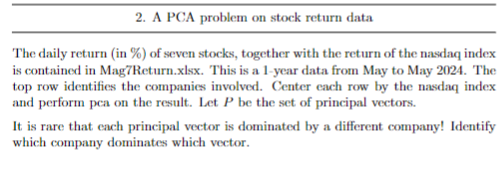

In [102]:
dir_file = os.getcwd() # returns path to current directory
files_dir = os.listdir(dir_file)  # list of files in current directory

xlsx_files = [f for f in files_dir if f.endswith('xlsx')]
print(xlsx_files)

data_file = xlsx_files[2]

data = pd.read_excel(data_file)
print(movie_df.columns)  # the columns
print(movie_df.shape)

['MovieReview-1.xlsx', 'TopMovies-1.xlsx', 'Mag7Return-1.xlsx']
Index(['Header', 'Movies', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')
(50, 7)


In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Center each row by subtracting the Nasdaq index return
data_centered = data.iloc[:, :-1].sub(data['nasdaq'], axis=0)

# Standardize the data before performing PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_centered)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)
principal_components = pca.transform(data_scaled)

# Create a DataFrame for the PCA components
pca_components = pd.DataFrame(pca.components_.T, index=data_centered.columns,
                              columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the components to determine dominant companies for each vector
pca_components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
aapl,-0.446136,-0.462476,0.082811,-0.105562,-0.165819,0.641865,0.359988
amzn,0.514633,-0.110605,-0.405321,-0.207854,-0.011001,-0.104999,0.710131
goog,0.227077,-0.466809,-0.397780,0.553343,0.388219,0.212666,-0.264890
meta,0.509482,0.080900,-0.070877,-0.416338,-0.274462,0.531532,-0.444598
msft,0.227357,-0.380228,0.569626,-0.376662,0.572791,-0.095355,-0.014337
nvda,0.274526,0.481191,0.416662,0.455537,0.174775,0.428193,0.313169
tsla,-0.312928,0.416304,-0.409298,-0.341673,0.622659,0.238307,0.002880


In [104]:
# Find the dominant company for each principal component
dominant_companies = pca_components.apply(lambda x: x.abs().idxmax())

# Display the dominant companies for each principal component
dominant_companies


,0
PC1,amzn
PC2,nvda
PC3,msft
PC4,goog
PC5,tsla
PC6,aapl
PC7,amzn
